In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = './Dataset/RAT_10000_original_E.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

In [3]:
# Display the first few rows and summary of the data
data_overview = data.head()
data_summary = data.describe(include='all')

data_overview, data_summary

(      MOA Building ID Apartment ID  Measurement ID  \
 0     ALH  01/10/2001            1               1   
 1     ALH  01/10/2001            1               1   
 2     ALH  01/10/2001            1               1   
 3  Domnis      101604       0018_0              35   
 4  Domnis      101604       0018_0              30   
 
                                         Component ID  \
 0                     Plaques souples antivibratiles   
 1  Joints d'étanchéité, joints plats prédécoupés ...   
 2                     Plaques souples antivibratiles   
 3                                      Dalles de sol   
 4                                      Dalles de sol   
 
                         Structure ID  \
 0  Equipements divers et accessoires   
 1  Equipements divers et accessoires   
 2  Equipements divers et accessoires   
 3  Planchers et planchers techniques   
 4  Planchers et planchers techniques   
 
                                       Component Type Room Type  \
 0       

# 1.0 Check out 

In [4]:
# List all columns that contain "ID" in their name
id_columns = [col for col in data.columns if 'ID' in col]

id_columns


['Building ID',
 'Apartment ID',
 'Measurement ID',
 'Component ID',
 'Structure ID']

Apply Label Encoding to ID Columns

In [5]:
from sklearn.preprocessing import LabelEncoder

# Copy the data to avoid modifying the original dataset
data_v1 = data.copy()

# Apply Label Encoding to each ID column
label_encoders = {}
for col in id_columns:
    le = LabelEncoder()
    data_v1[col] = le.fit_transform(data_v1[col])
    label_encoders[col] = le

# Display the first few rows of the transformed data
data_v1.head()


/Users/aleph/opt/anaconda3/envs/ML_py12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


,MOA,Building ID,Apartment ID,Measurement ID,Component ID,Structure ID,Component Type,Room Type,Building Type,Year,...,Heating Type,Apartment Type,Floor,Location Precision,Year of Construction,Number of Apartments,Number of Floors,Habitable Surface,Department Code,Asbestos Presence
0,ALH,30,85,0,52,3,Baignoires,D_CUIS,Maison individuelle,1975,...,Collectif,T1BIS,RDC,NaN,NaN,NaN,NaN,NaN,49,0
1,ALH,30,85,0,33,3,"Chaudières (mixtes, collectives), chauffe bain...",D_CUIS,Maison individuelle,1975,...,Collectif,T1BIS,RDC,NaN,NaN,NaN,NaN,NaN,49,0
2,ALH,30,85,0,52,3,Eviers métalliques,D_CUIS,Maison individuelle,1975,...,Collectif,T1BIS,RDC,NaN,NaN,NaN,NaN,NaN,49,0
3,Domnis,391,28,34,17,8,Revêtements de sols,WC,Maison individuelle,1967,...,NaN,NaN,0,NaN,1967.0,NaN,2,NaN,95,1
4,Domnis,391,28,29,17,8,Revêtements de sols,Entrée,Maison individuelle,1967,...,NaN,NaN,0,NaN,1967.0,NaN,2,NaN,95,1


Transform Floor column

In [6]:
# Replace 'RDC' values in the 'Floor' column with 0 and convert the column to numerical
data_v1['Floor'] = data_v1['Floor'].replace('RDC', 0)

# Convert the 'Floor' column to a numerical data type
data_v1['Floor'] = pd.to_numeric(data_v1['Floor'], errors='coerce')

# Display the first few rows of the transformed data to verify the changes
data_v1.head(), data_v1['Floor'].unique()


(      MOA  Building ID  Apartment ID  Measurement ID  Component ID  \
 0     ALH           30            85               0            52   
 1     ALH           30            85               0            33   
 2     ALH           30            85               0            52   
 3  Domnis          391            28              34            17   
 4  Domnis          391            28              29            17   
 
    Structure ID                                     Component Type Room Type  \
 0             3                                         Baignoires    D_CUIS   
 1             3  Chaudières (mixtes, collectives), chauffe bain...    D_CUIS   
 2             3                                 Eviers métalliques    D_CUIS   
 3             8                                Revêtements de sols        WC   
 4             8                                Revêtements de sols    Entrée   
 
          Building Type  Year  ... Heating Type  Apartment Type Floor  \
 0  Maison 

“Year” and  “Year of Construction” 

In [7]:
data_v2 = data_v1.copy()
# Copy all values in 'Year' column to 'Year of Construction' column
data_v2['Year of Construction'] = data_v2['Year']

# Drop the 'Year' column
data_v2 = data_v2.drop(columns=['Year'])

# Display the first few rows of the transformed data to verify the changes
data_v2.head()



,MOA,Building ID,Apartment ID,Measurement ID,Component ID,Structure ID,Component Type,Room Type,Building Type,Evaluator Name,...,Heating Type,Apartment Type,Floor,Location Precision,Year of Construction,Number of Apartments,Number of Floors,Habitable Surface,Department Code,Asbestos Presence
0,ALH,30,85,0,52,3,Baignoires,D_CUIS,Maison individuelle,JEAN XXIII,...,Collectif,T1BIS,0.0,NaN,1975,NaN,NaN,NaN,49,0
1,ALH,30,85,0,33,3,"Chaudières (mixtes, collectives), chauffe bain...",D_CUIS,Maison individuelle,JEAN XXIII,...,Collectif,T1BIS,0.0,NaN,1975,NaN,NaN,NaN,49,0
2,ALH,30,85,0,52,3,Eviers métalliques,D_CUIS,Maison individuelle,JEAN XXIII,...,Collectif,T1BIS,0.0,NaN,1975,NaN,NaN,NaN,49,0
3,Domnis,391,28,34,17,8,Revêtements de sols,WC,Maison individuelle,NaN,...,NaN,NaN,0.0,NaN,1967,NaN,2,NaN,95,1
4,Domnis,391,28,29,17,8,Revêtements de sols,Entrée,Maison individuelle,NaN,...,NaN,NaN,0.0,NaN,1967,NaN,2,NaN,95,1


“Street Number” column replace ‘-’ with blank 

In [8]:
data_v2['Street Number'].unique()

array(['104', '-', '11', '13', '15', '164', '10', '6', '4', '30', '23',
       '19', '7', '16', '2', '58', '60', '62', '64', '66', '68', '70',
       '72', '74', '76', '78', '80', '82', '84', '86', '88', '90', '92',
       '94', '96', '98', '100', '3', '1', '22', '9', '110', '108', '106',
       '28', '5', '12', '34', '40', '42', '51', nan, '20', '24', '17'],
      dtype=object)

In [9]:
# Replace '-' with blank in the 'Street Number' column
#data['Street Number'] = data['Street Number'].str.replace('-', 'nan', regex=False)
data_v2['Street Number'] = data_v2['Street Number'].astype(str).str.replace('-', '', regex=False)
data_v2['Street Number'] = data_v2['Street Number'].astype(str).str.replace('nan', '', regex=False)
data_v2['Street Number'].unique()

array(['104', '', '11', '13', '15', '164', '10', '6', '4', '30', '23',
       '19', '7', '16', '2', '58', '60', '62', '64', '66', '68', '70',
       '72', '74', '76', '78', '80', '82', '84', '86', '88', '90', '92',
       '94', '96', '98', '100', '3', '1', '22', '9', '110', '108', '106',
       '28', '5', '12', '34', '40', '42', '51', '20', '24', '17'],
      dtype=object)

In [10]:
data_v2['Street Number'] = pd.to_numeric(data_v2['Street Number'], errors='coerce')


# 1.1 Handling Missing Values

In [11]:
data_v3 = data_v2.copy()
missing_values = data_v3.isnull().sum()

# Display the columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]
missing_values

Evaluator Name             4984
Year of Service            4746
External Wall Material     4984
Street Number              4804
Street Complement         10012
Street Type                4984
Street Name                4746
Postal Code                4746
Heating Type               4984
Apartment Type              286
Floor                      4794
Location Precision         8512
Number of Apartments       5349
Number of Floors           9533
Habitable Surface          5349
dtype: int64

In [12]:
column_types = data_v3.dtypes
print(column_types)

MOA                        object
Building ID                 int64
Apartment ID                int64
Measurement ID              int64
Component ID                int64
Structure ID                int64
Component Type             object
Room Type                  object
Building Type              object
Evaluator Name             object
Year of Service           float64
External Wall Material     object
Street Number             float64
Street Complement          object
Street Type                object
Street Name                object
Postal Code               float64
Municipality               object
Heating Type               object
Apartment Type             object
Floor                     float64
Location Precision         object
Year of Construction        int64
Number of Apartments      float64
Number of Floors           object
Habitable Surface         float64
Department Code             int64
Asbestos Presence           int64
dtype: object


In [13]:
numerical_columns = data_v3.select_dtypes(include=['number']).columns
categorical_columns = data_v3.select_dtypes(include=['object']).columns
print('numerical_columns',numerical_columns)
print('categorical_columns',categorical_columns)

numerical_columns Index(['Building ID', 'Apartment ID', 'Measurement ID', 'Component ID',
       'Structure ID', 'Year of Service', 'Street Number', 'Postal Code',
       'Floor', 'Year of Construction', 'Number of Apartments',
       'Habitable Surface', 'Department Code', 'Asbestos Presence'],
      dtype='object')
categorical_columns Index(['MOA', 'Component Type', 'Room Type', 'Building Type', 'Evaluator Name',
       'External Wall Material', 'Street Complement', 'Street Type',
       'Street Name', 'Municipality', 'Heating Type', 'Apartment Type',
       'Location Precision', 'Number of Floors'],
      dtype='object')


Data Cleaning Steps Performed:
*
- Imputed with median( Year of Service,  Year of Construction, Number of Apartments,Habitable Surface)
- Imputed with mode(External Wall Material, Street Type, Heating Type, Apartment Type, Floor, Number of Floors )

   

In [14]:
from sklearn.impute import SimpleImputer
import pandas as pd
# Separate numerical and categorical columns
numerical_cols = data_v3.select_dtypes(include=['number']).columns
categorical_cols = data_v3.select_dtypes(include=['object']).columns

# Impute numerical columns with the median
imputer_num = SimpleImputer(strategy='median')
data_v3[numerical_cols] = imputer_num.fit_transform(data_v3[numerical_cols])

# Impute categorical columns with the most frequent value (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
data_v3[categorical_cols] = imputer_cat.fit_transform(data_v3[categorical_cols])

# Verify that there are no more missing values
print("Missing values after imputation:")
print(data_v3.isnull().sum().sum())


Missing values after imputation:
0


In [15]:
data_v3['Street Number'].unique()

array([104.,  66.,  11.,  13.,  15., 164.,  10.,   6.,   4.,  30.,  23.,
        19.,   7.,  16.,   2.,  58.,  60.,  62.,  64.,  68.,  70.,  72.,
        74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100.,   3.,   1.,  22.,   9., 110., 108., 106.,  28.,
         5.,  12.,  34.,  40.,  42.,  51.,  20.,  24.,  17.])

In [16]:
missing_values = data_v3.isnull().sum()

# Display the columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

# 1. Inconsistencies Remove or Correct Duplicate Entries

In [17]:
# Check for duplicate rows in the dataset
duplicate_rows = data_v3.duplicated()

# Number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Remove duplicate rows
data_cleaned_no_duplicates = data_v3.drop_duplicates()

num_duplicates, data_cleaned_no_duplicates.shape

# will keep using data_v3

(0, (10095, 28))

no duplicate rows found in the dataset, no further action was necessary for this step.

# 1.2 Standardize Inconsistent Data Formats

In [18]:

# Convert all textual data to a consistent format (e.g., lowercase for categorical variables)

# Identifying categorical columns
categorical_columns = data_v3.select_dtypes(include=['object']).columns

# Convert all textual data to lowercase
for column in categorical_columns:
    data_v3[column] = data_v3[column].str.lower()

# Check the result of conversion for the first few rows
data_v3.head()


,MOA,Building ID,Apartment ID,Measurement ID,Component ID,Structure ID,Component Type,Room Type,Building Type,Evaluator Name,...,Heating Type,Apartment Type,Floor,Location Precision,Year of Construction,Number of Apartments,Number of Floors,Habitable Surface,Department Code,Asbestos Presence
0,alh,30.0,85.0,0.0,52.0,3.0,baignoires,d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
1,alh,30.0,85.0,0.0,33.0,3.0,"chaudières (mixtes, collectives), chauffe bain...",d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
2,alh,30.0,85.0,0.0,52.0,3.0,eviers métalliques,d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
3,domnis,391.0,28.0,34.0,17.0,8.0,revêtements de sols,wc,maison individuelle,picotiere,...,collectif,t3,0.0,facade avant,1967.0,13.0,2,872.0,95.0,1.0
4,domnis,391.0,28.0,29.0,17.0,8.0,revêtements de sols,entrée,maison individuelle,picotiere,...,collectif,t3,0.0,facade avant,1967.0,13.0,2,872.0,95.0,1.0


In [19]:
# Verify that there are no more missing values
print("Missing values after imputation:")
print(data_v3.isnull().sum().sum())

Missing values after imputation:
0


# 1.3 Check  and Correct Data Entry Errors

/Users/aleph/opt/anaconda3/envs/ML_py12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleph/opt/anaconda3/envs/ML_py12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleph/opt/anaconda3/envs/ML_py12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleph/opt/anaconda3/envs/ML_py12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

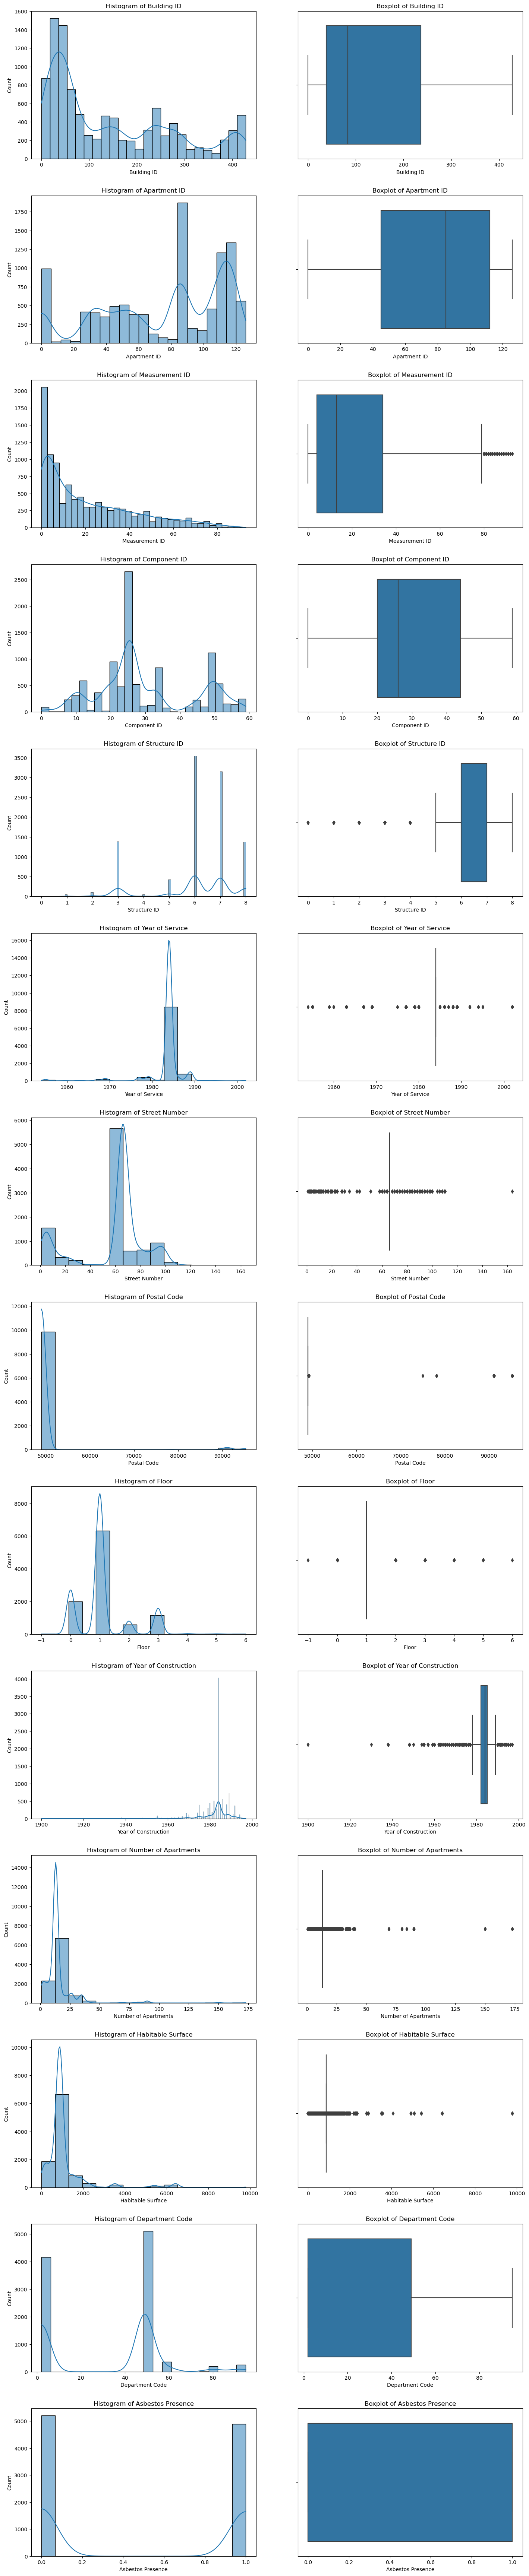

,Building ID,Apartment ID,Measurement ID,Component ID,Structure ID,Year of Service,Street Number,Postal Code,Floor,Year of Construction,Number of Apartments,Habitable Surface,Department Code,Asbestos Presence
count,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000,10095.000000
mean,142.753442,74.342843,21.167211,29.913026,6.045765,1983.472412,58.416939,50016.679049,1.102229,1982.721347,14.605844,1070.659534,31.657949,0.484497
std,128.827126,38.275539,21.128199,13.879030,1.578814,4.195279,27.319079,6528.686190,0.863734,6.690038,12.407976,1035.649326,26.096774,0.499784
min,0.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,1.000000,49000.000000,-1.000000,1900.000000,1.000000,0.000000,2.000000,0.000000
25%,38.000000,45.000000,4.000000,20.000000,6.000000,1984.000000,66.000000,49000.000000,1.000000,1982.000000,13.000000,872.000000,2.000000,0.000000
50%,83.000000,85.000000,13.000000,26.000000,6.000000,1984.000000,66.000000,49000.000000,1.000000,1984.000000,13.000000,872.000000,49.000000,0.000000
75%,236.000000,112.000000,34.000000,44.000000,7.000000,1984.000000,66.000000,49000.000000,1.000000,1985.000000,13.000000,872.000000,49.000000,1.000000
max,428.000000,126.000000,93.000000,59.000000,8.000000,2002.000000,164.000000,95330.000000,6.000000,1997.000000,173.000000,9789.000000,95.000000,1.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms and boxplots for numerical columns to visually inspect for outliers and anomalies
numerical_columns = data_v3.select_dtypes(include=['number']).columns

# Creating histograms and boxplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 5 * len(numerical_columns)))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    sns.histplot(data_v3[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {column}')
    
    sns.boxplot(x=data_v3[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.show()

# Calculate basic statistics for numerical columns
statistics = data_v3[numerical_columns].describe()
statistics



In [21]:
# Verify that there are no more missing values
print("Missing values after imputation:")
print(data_v3.isnull().sum().sum())

Missing values after imputation:
0


1.3 Feature Engineering -Create New Features

In [22]:
"""""
import datetime

# Current year for calculating age and service duration
current_year = datetime.datetime.now().year


# Calculate Age of Building
data_v3['Age of Building'] = current_year - data_v3['Year of Construction']

# Calculate Service Duration
data_v3['Service Duration'] = current_year - data_v3['Year of Service']

# Display the first few rows to verify the new features
data_v3[['Year of Construction', 'Age of Building', 'Year of Service', 'Service Duration']].head()
"""

'""\nimport datetime\n\n# Current year for calculating age and service duration\ncurrent_year = datetime.datetime.now().year\n\n\n# Calculate Age of Building\ndata_v3[\'Age of Building\'] = current_year - data_v3[\'Year of Construction\']\n\n# Calculate Service Duration\ndata_v3[\'Service Duration\'] = current_year - data_v3[\'Year of Service\']\n\n# Display the first few rows to verify the new features\ndata_v3[[\'Year of Construction\', \'Age of Building\', \'Year of Service\', \'Service Duration\']].head()\n'

In [23]:
data_v3.head()

,MOA,Building ID,Apartment ID,Measurement ID,Component ID,Structure ID,Component Type,Room Type,Building Type,Evaluator Name,...,Heating Type,Apartment Type,Floor,Location Precision,Year of Construction,Number of Apartments,Number of Floors,Habitable Surface,Department Code,Asbestos Presence
0,alh,30.0,85.0,0.0,52.0,3.0,baignoires,d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
1,alh,30.0,85.0,0.0,33.0,3.0,"chaudières (mixtes, collectives), chauffe bain...",d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
2,alh,30.0,85.0,0.0,52.0,3.0,eviers métalliques,d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
3,domnis,391.0,28.0,34.0,17.0,8.0,revêtements de sols,wc,maison individuelle,picotiere,...,collectif,t3,0.0,facade avant,1967.0,13.0,2,872.0,95.0,1.0
4,domnis,391.0,28.0,29.0,17.0,8.0,revêtements de sols,entrée,maison individuelle,picotiere,...,collectif,t3,0.0,facade avant,1967.0,13.0,2,872.0,95.0,1.0


In [24]:
missing_values = data_v3.isnull().sum()

# Display the columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

In [25]:
target_variable = 'Asbestos Presence'
columns = [col for col in data_v3.columns if col != target_variable] + [target_variable]
data_v3 = data_v3[columns]

In [26]:
# Verify that there are no more missing values
print("Missing values after imputation:")
print(data_v3.isnull().sum().sum())

Missing values after imputation:
0


# Step#2 : Data Transformation and Feature Engineering

In [27]:
data_v3.head()

,MOA,Building ID,Apartment ID,Measurement ID,Component ID,Structure ID,Component Type,Room Type,Building Type,Evaluator Name,...,Heating Type,Apartment Type,Floor,Location Precision,Year of Construction,Number of Apartments,Number of Floors,Habitable Surface,Department Code,Asbestos Presence
0,alh,30.0,85.0,0.0,52.0,3.0,baignoires,d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
1,alh,30.0,85.0,0.0,33.0,3.0,"chaudières (mixtes, collectives), chauffe bain...",d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
2,alh,30.0,85.0,0.0,52.0,3.0,eviers métalliques,d_cuis,maison individuelle,jean xxiii,...,collectif,t1bis,0.0,facade avant,1975.0,13.0,4,872.0,49.0,0.0
3,domnis,391.0,28.0,34.0,17.0,8.0,revêtements de sols,wc,maison individuelle,picotiere,...,collectif,t3,0.0,facade avant,1967.0,13.0,2,872.0,95.0,1.0
4,domnis,391.0,28.0,29.0,17.0,8.0,revêtements de sols,entrée,maison individuelle,picotiere,...,collectif,t3,0.0,facade avant,1967.0,13.0,2,872.0,95.0,1.0


In [28]:
# Save the complete processed data before splitting with UTF-8 encoding
data_v3.to_csv('./Dataset/processed_data_with_Categorical.csv', index=False, encoding='latin1')


# 2.1 Label Encoding All Categorical Columns

In [29]:
# Identify all categorical columns
categorical_cols = data_v3.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['MOA', 'Component Type', 'Room Type', 'Building Type', 'Evaluator Name',
       'External Wall Material', 'Street Complement', 'Street Type',
       'Street Name', 'Municipality', 'Heating Type', 'Apartment Type',
       'Location Precision', 'Number of Floors'],
      dtype='object')


In [30]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_v3[col] = le.fit_transform(data_v3[col])
    label_encoders[col] = le

# Display the first few rows of the transformed data
print(data_v3.head())

# Save the label encoders for future use (e.g., for transforming new data)
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


   MOA  Building ID  Apartment ID  Measurement ID  Component ID  Structure ID  \
0    0         30.0          85.0             0.0          52.0           3.0   
1    0         30.0          85.0             0.0          33.0           3.0   
2    0         30.0          85.0             0.0          52.0           3.0   
3    2        391.0          28.0            34.0          17.0           8.0   
4    2        391.0          28.0            29.0          17.0           8.0   

   Component Type  Room Type  Building Type  Evaluator Name  ...  \
0               1         32              1              11  ...   
1               2         32              1              11  ...   
2               9         32              1              11  ...   
3              25         78              1              15  ...   
4              25         50              1              15  ...   

   Heating Type  Apartment Type  Floor  Location Precision  \
0             0               6    0.0    

In [31]:
numerical_columns = data_v3.select_dtypes(include=['number']).columns
categorical_columns = data_v3.select_dtypes(include=['object']).columns
print('numerical_columns',numerical_columns)
print('categorical_columns',categorical_columns)

numerical_columns Index(['MOA', 'Building ID', 'Apartment ID', 'Measurement ID', 'Component ID',
       'Structure ID', 'Component Type', 'Room Type', 'Building Type',
       'Evaluator Name', 'Year of Service', 'External Wall Material',
       'Street Number', 'Street Complement', 'Street Type', 'Street Name',
       'Postal Code', 'Municipality', 'Heating Type', 'Apartment Type',
       'Floor', 'Location Precision', 'Year of Construction',
       'Number of Apartments', 'Number of Floors', 'Habitable Surface',
       'Department Code', 'Asbestos Presence'],
      dtype='object')
categorical_columns Index([], dtype='object')


In [32]:
missing_values = data_v3.isnull().sum()

# Display the columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

# Save Processed Data

In [33]:
# Save the complete processed data before splitting
data_v3.to_csv('./Dataset/processed_data_All_numerical.csv', index=False)